# Image compression with Principal Component Analysis (PCA)

---

<small>*Notebook created by Rodolfo G. Blanco Rodriguez. Most of the material in this notebook was taken from Kaggle notebook: Introduction to PCA: Image Compression example by Mirza Rahim.*<small>

---

An image can be treated as a matrix, thid indeed a grid of pixels, with values being the pixel intensities.
The basic steps we'll follow:
- Apply PCA on the image matrix to reduce the dimensionality to a smaller number of principal components (PCs). This is lossy compression, as we are discarding some of the information.
- To assess how much visual information we retained, we'll reconstruct the image from the limited number of PC.
- We'll see how good the reconstructed images are for different number of selecte components.

## 1. Get the data
Importing the required libraries, importing the image as a matrix, and displaying the image.

In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [2]:
image_raw = imread("revolucionCDMX.jpg")
image_raw.shape

(627, 940, 3)

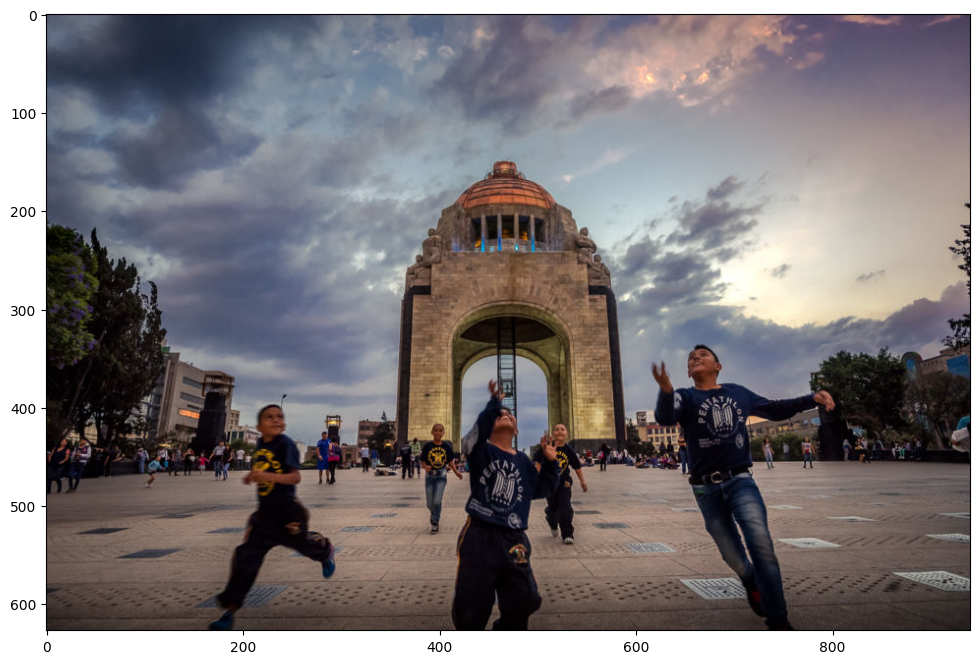

In [3]:
# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

**About the image**:
The image is a colour image, this means it has data in 3 channels- Red, Green, Blue.   
Hence the shape of the data - 940 x 627 x 3  - it is essentially a 940 x 627 matrix for each channel.

In [4]:
image_raw[0]

array([[ 83,  91, 110],
       [ 82,  90, 109],
       [ 82,  90, 109],
       ...,
       [ 72,  64,  88],
       [ 72,  64,  88],
       [ 72,  64,  88]], dtype=uint8)

While we could work with 3 channels, simply working with 3 matrices, for the purpose of demonstrating and for avoiding distraction from the core lesson, we're going to convert the image to Black & White (greyscale, actually).  

**Converting to greyscale**
1. summing RGBs channel values for each pixel
2. capping values to 1

We'll plot the matrix as a greyscale image.

In [5]:
image_sum = image_raw.sum(axis=2)
image_sum.shape

(627, 940)

In [6]:
image_sum[0]

array([284, 281, 281, 281, 281, 281, 284, 287, 285, 285, 285, 285, 288,
       294, 297, 300, 305, 308, 314, 314, 314, 317, 326, 332, 323, 326,
       329, 332, 332, 332, 332, 332, 335, 335, 338, 341, 344, 344, 347,
       347, 346, 343, 343, 340, 337, 337, 337, 337, 329, 329, 329, 326,
       326, 329, 332, 332, 323, 320, 317, 317, 314, 305, 296, 287, 274,
       268, 259, 250, 247, 241, 235, 229, 221, 218, 215, 212, 206, 197,
       194, 188, 188, 185, 182, 176, 170, 164, 161, 158, 155, 155, 152,
       149, 146, 146, 146, 149, 143, 146, 146, 146, 149, 149, 152, 152,
       149, 146, 143, 143, 140, 143, 143, 143, 143, 143, 140, 137, 134,
       134, 134, 134, 137, 137, 137, 137, 140, 140, 140, 140, 140, 140,
       140, 143, 143, 146, 146, 146, 151, 151, 151, 151, 151, 151, 151,
       151, 160, 160, 160, 160, 163, 163, 163, 163, 161, 161, 158, 158,
       161, 161, 164, 164, 171, 168, 168, 165, 162, 162, 159, 159, 164,
       164, 164, 161, 161, 161, 161, 161, 161, 161, 161, 161, 15

## 2. Normalization
We have a new matrix of data, we're going to normalize the image

In [7]:
image_bw = (image_sum-image_sum.min())/(image_sum.max()-image_sum.min())
image_bw.min(), image_bw.max()

(0.0, 1.0)

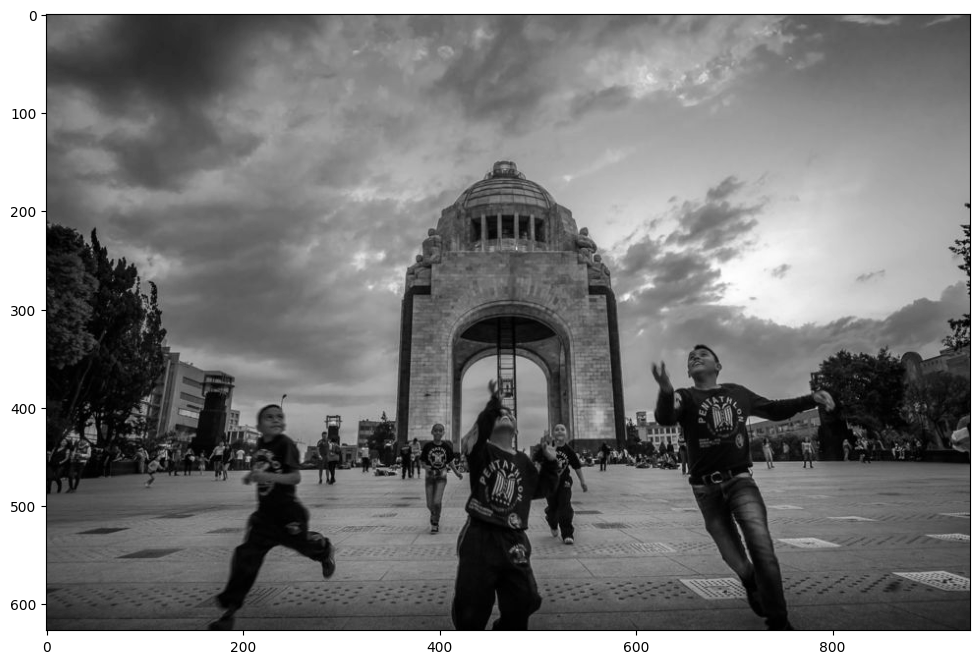

In [8]:
plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

## 3. Performing PCA on the image
 - We'll perform PCA on the matrix with all the components
 - We'll then look at the screen-plot to assess how many components we could retain and how much cumulative variance they capture
 - We'll pick a suitable number of components to represent the image for compression

In [9]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

PCA()

Number of components explaining 95% variance: 28


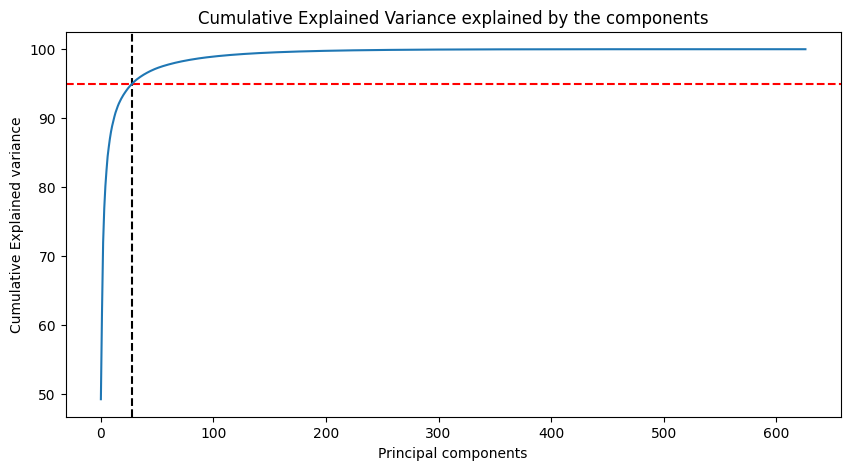

In [10]:
# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print(f'Number of components explaining 95% variance: {k}')

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.plot(var_cumu)

**Looks like 28 components, instead of 627 pixels, can explain 95% of the variance in the image!**  
28 instead of 627!!!  

Let's reconstruct the image using only 28 components and see if the reconstructed image is visually very different from the original.

## 4. Reconstruction
1. First, we'll use the `fit_transform` method from the IncrementalPCA module to first find the 28 PCs and transform and represent the data in those 28 new components/columns.  
2. Next, we'll reconstruct the original matrix from these 28 components using the `inverse_transform` method.  

We'll then plot the image to visually assess the quality of it.

In [11]:
ipca = IncrementalPCA(n_components=k)
ipca_red = ipca.fit_transform(image_bw)
image_recon = ipca.inverse_transform(ipca_red)

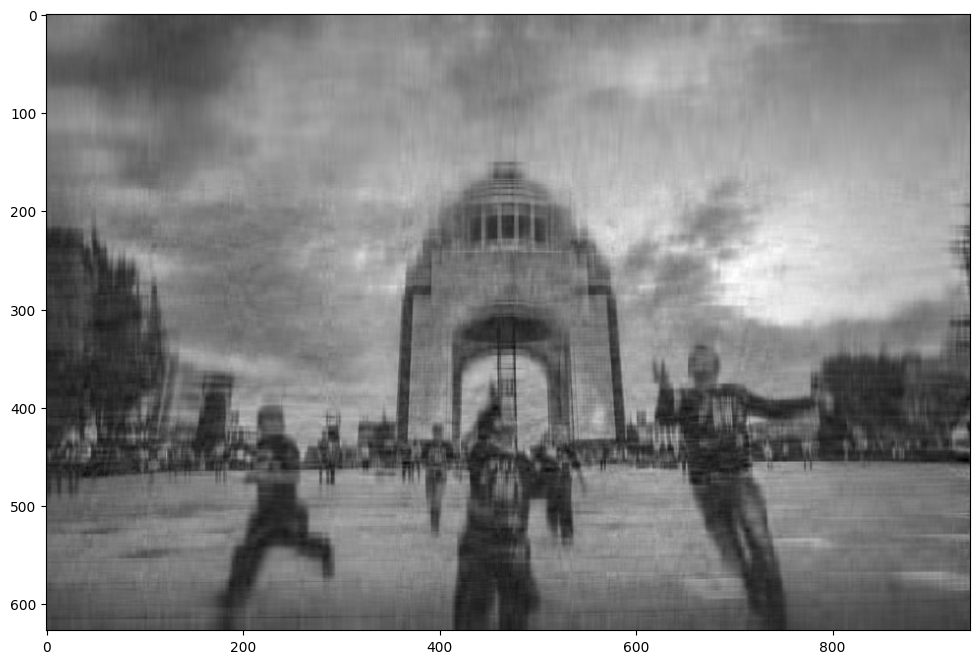

In [12]:
# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

Well, for 95% variance, we expected a clearer image, didn't we? Note that we got all the major elements captured for sure - you can still very well identify objects.

What's missing is the clarity - well, maybe it's the finer details in the visuals that make an image appealing and clear.

#### Let's try out a different value of k: 150 components  

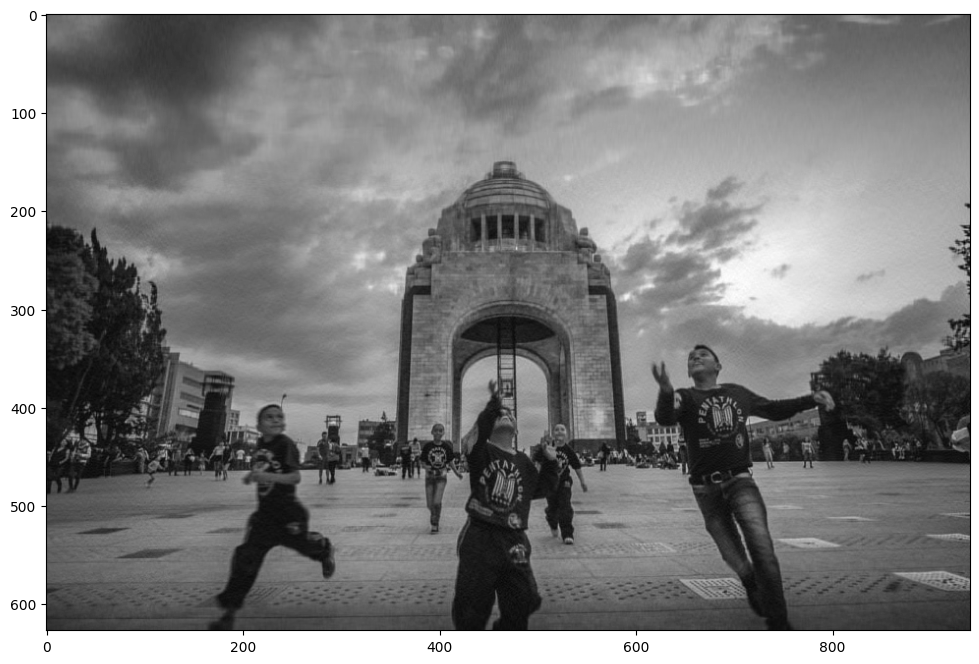

In [13]:
# Function to reconstruct and plot image for a given number of components

def reduce(k, data):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(data))
    return image_recon
    
plt.figure(figsize=[12,8])
plt.imshow(reduce(150, image_bw),cmap = plt.cm.gray)

Much better! Just a little bit grainy, but the details are all there. On a smaller resolution, you probably won't be able to detect the differences from the original greyscale image very easily.

### Reconstructing and plotting for different number of components
- we'll try out different number of components, begining from 10, ending at 250
- we'll reconstruct the image at each `k` and plot the images

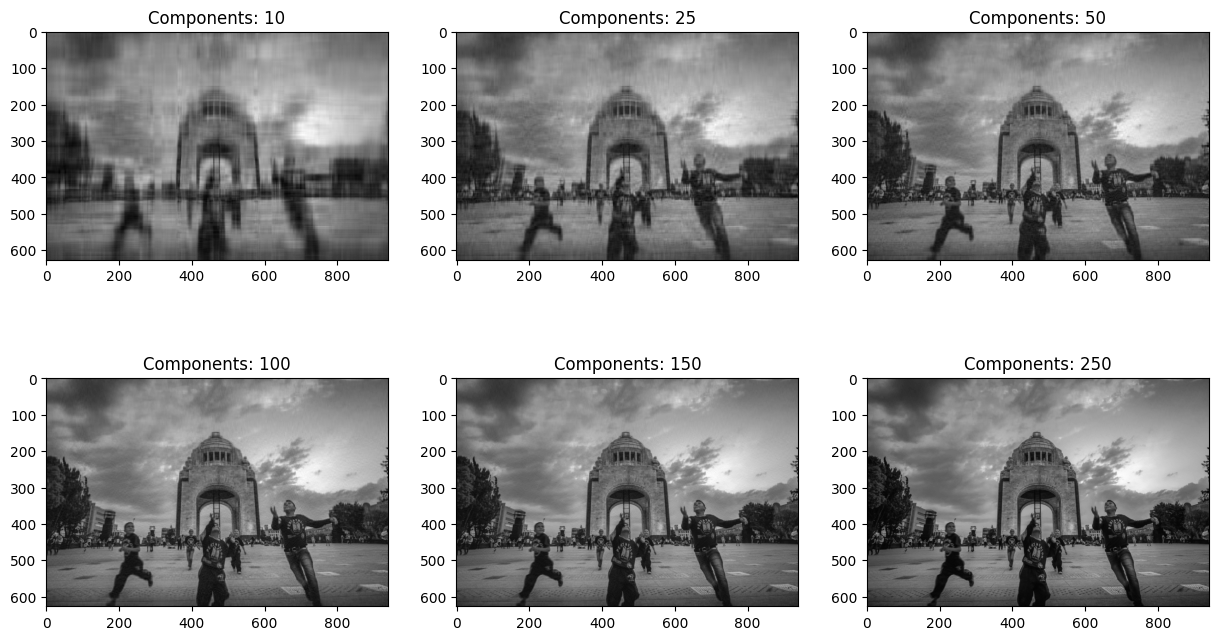

In [14]:
ks = [10, 25, 50, 100, 150, 250]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    compressed = reduce(ks[i], image_bw)
    plt.imshow(compressed,cmap = plt.cm.gray)
    plt.title(f'Components: {ks[i]}')

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

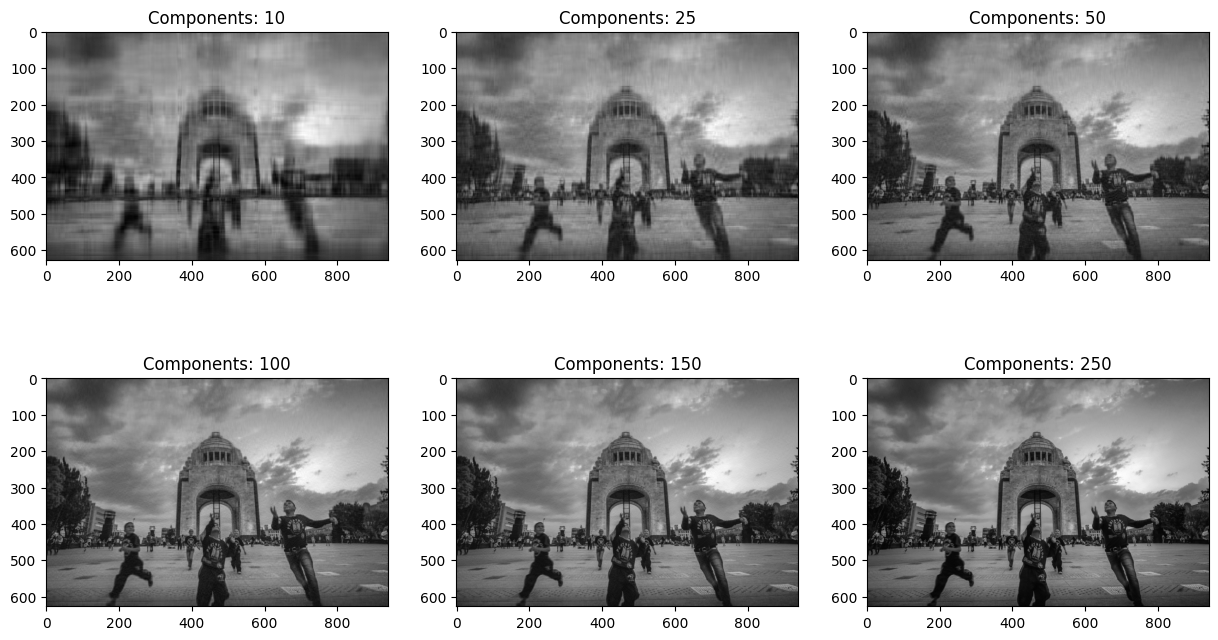

In [15]:
ks = [10, 25, 50, 100, 150, 250]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    compressed = reduce(ks[i], image_bw.T)
    plt.imshow(compressed.T,cmap = plt.cm.gray)
    plt.title(f'Components: {ks[i]}')

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

# End of the code
---